<a href="https://colab.research.google.com/github/Dhanasekaran-MS/Machine-Learning-projects/blob/main/TrainTestSplit_CrossValidation_and_HyperParameterTuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df= pd.read_csv('breast_cancer_data.csv')

In [ ]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
df = df.iloc[:,:-1]
df.drop('id', axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [ ]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
df.diagnosis.value_counts()
# M - Cancer (Malicious)
# B - No cancer (Benign)

diagnosis
B    357
M    212
Name: count, dtype: int64

In [ ]:
df.corr(numeric_only=True)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


perimeter_mean, area_mean, perimeter_worst, area_worst	are highly correlated with radius mean so dropping them

In [ ]:
df.drop(columns=['perimeter_mean', 'area_mean','radius_se', 'perimeter_worst','concave points_mean','concavity_worst', 'area_worst', 'radius_worst', 'texture_worst', 'texture_se', 'area_se'], axis=1, inplace=True)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

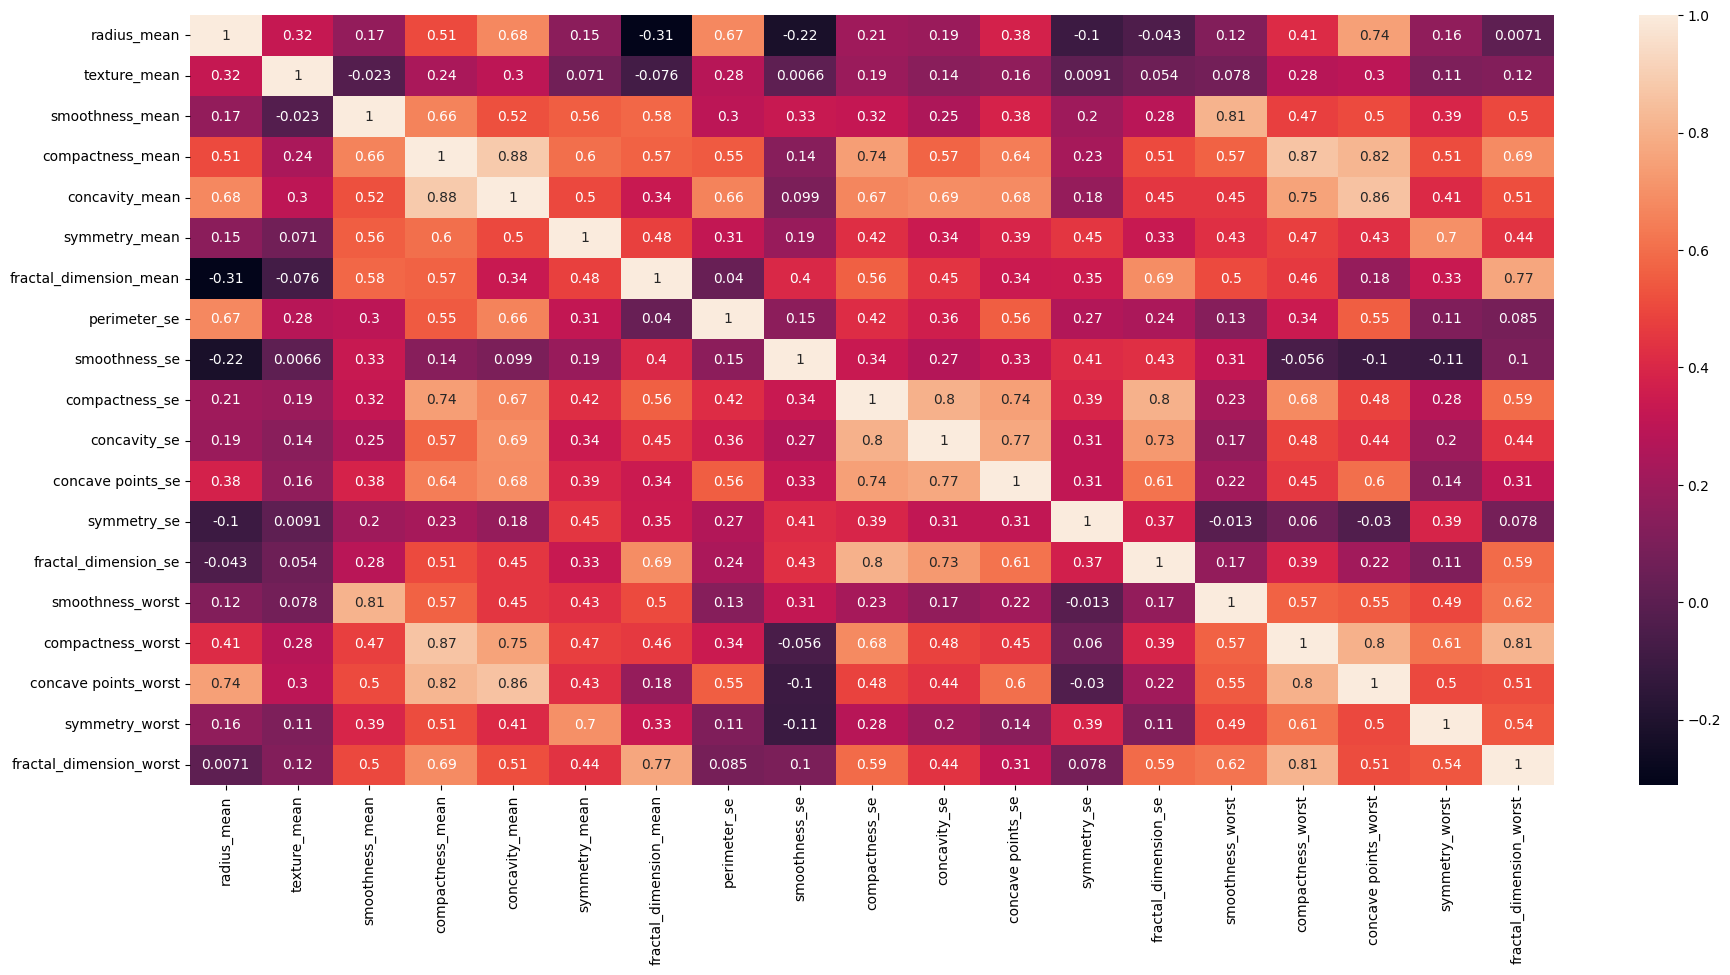

In [ ]:
plt.figure(figsize=(22, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True)

In [ ]:
df.diagnosis = df.diagnosis.map({'M':1, 'B':0})

In [ ]:
X = df.drop('diagnosis', axis=1)
y = df.diagnosis

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
models = [LogisticRegression(), KNeighborsClassifier(), SVC(), DecisionTreeClassifier()]

In [ ]:
def train_test_evaluation():

  for model in models:
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy of {model} is {accuracy}")

In [ ]:
train_test_evaluation()

Accuracy of LogisticRegression() is 0.9649122807017544
Accuracy of KNeighborsClassifier() is 0.9210526315789473
Accuracy of SVC() is 0.9210526315789473
Accuracy of DecisionTreeClassifier() is 0.9035087719298246


In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
def cross_valid_evaluation():
  for model in models:
    cv = cross_val_score(model, X, y, cv=5)
    print(cv)
    print(f"Accuracy of {model} is {cv.mean()}")
    print('----------------------------------------------------------')

In [ ]:
cross_valid_evaluation()

[0.89473684 0.9122807  0.92982456 0.92105263 0.92035398]
Accuracy of LogisticRegression() is 0.915649743828598
----------------------------------------------------------
[0.85087719 0.86842105 0.90350877 0.92105263 0.89380531]
Accuracy of KNeighborsClassifier() is 0.887532991771464
----------------------------------------------------------
[0.84210526 0.88596491 0.9122807  0.92982456 0.92035398]
Accuracy of SVC() is 0.898105884179475
----------------------------------------------------------
[0.92105263 0.92105263 0.96491228 0.94736842 0.9380531 ]
Accuracy of DecisionTreeClassifier() is 0.9384878124514826
----------------------------------------------------------


**HYPER PARAMETER TUNING**




In [ ]:
df= pd.read_csv('breast_cancer_data.csv')
df = df.iloc[:,:-1]
df.drop('id', axis=1, inplace=True)

In [ ]:
df.shape

(569, 31)

In [ ]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [ ]:
x = df.drop('diagnosis', axis=1)
y = df.diagnosis

In [ ]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [ ]:
X = np.asarray(x)
Y = np.asarray(y)

### **GridSearchCV**

In [ ]:
# Loading thr model
model = SVC()

In [ ]:
#  Hyper parameters
parameters = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [1, 5, 10, 20]
}

In [ ]:
# Grid Search / cv --> Cross Validation
clf = GridSearchCV(model, parameters, cv=5)

In [ ]:
# Fitting the data to our model ---> no need for TTS becoz we are using CrossValidation
clf.fit(X, Y)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 5, 10, 20],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [ ]:
clf.cv_results_

{'mean_fit_time': array([4.26663890e+00, 6.79960251e-03, 8.06603432e-03, 2.51518250e-02,
        4.45071206e+00, 4.27722931e-03, 4.79831696e-03, 1.48407459e-02,
        3.01876354e+00, 4.63576317e-03, 4.40392494e-03, 1.42105103e-02,
        5.41141953e+00, 6.11171722e-03, 4.76856232e-03, 1.39959335e-02]),
 'std_fit_time': array([1.54802011e+00, 2.80729250e-04, 4.98464104e-04, 2.98142280e-03,
        1.74673623e+00, 1.97589662e-04, 2.94897688e-04, 4.82066368e-04,
        8.66292450e-01, 3.12689630e-04, 2.44685660e-04, 5.06734904e-04,
        1.42769609e+00, 1.36027169e-03, 2.07015951e-04, 2.24935738e-04]),
 'mean_score_time': array([0.00244222, 0.00241408, 0.00352182, 0.00775032, 0.00137539,
        0.0014648 , 0.00202851, 0.00401092, 0.00139909, 0.00141344,
        0.00180087, 0.00384407, 0.00173388, 0.00169048, 0.00172601,
        0.00387664]),
 'std_score_time': array([3.64023483e-04, 5.16953060e-05, 9.37145283e-05, 1.57357450e-03,
        8.08217743e-05, 6.64756834e-05, 1.80312073e-

In [ ]:
# Loading the res to Pd DataFrame
results = pd.DataFrame(clf.cv_results_)

In [ ]:
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,4.266639,1.548020,0.002442,0.000364,1,linear,"{'C': 1, 'kernel': 'linear'}",0.947368,0.929825,0.973684,0.921053,0.955752,0.945536,0.018689,4
1,0.006800,0.000281,0.002414,0.000052,1,poly,"{'C': 1, 'kernel': 'poly'}",0.842105,0.885965,0.929825,0.947368,0.938053,0.908663,0.039382,12
2,0.008066,0.000498,0.003522,0.000094,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.850877,0.894737,0.929825,0.947368,0.938053,0.912172,0.035444,11
3,0.025152,0.002981,0.007750,0.001574,1,sigmoid,"{'C': 1, 'kernel': 'sigmoid'}",0.543860,0.456140,0.464912,0.385965,0.451327,0.460441,0.050253,13
4,4.450712,1.746736,0.001375,0.000081,5,linear,"{'C': 5, 'kernel': 'linear'}",0.947368,0.938596,0.973684,0.929825,0.973451,0.952585,0.018008,1


In [ ]:
clf.best_params_

{'C': 5, 'kernel': 'linear'}

In [ ]:
clf.best_score_

0.952585002328831

In [ ]:
gridsearch_results = results[['param_C', 'param_kernel', 'mean_test_score']]

In [ ]:
gridsearch_results

,param_C,param_kernel,mean_test_score
0,1,linear,0.945536
1,1,poly,0.908663
2,1,rbf,0.912172
3,1,sigmoid,0.460441
4,5,linear,0.952585
5,5,poly,0.922729
6,5,rbf,0.931501
7,5,sigmoid,0.411178
8,10,linear,0.950815
9,10,poly,0.920975


best param = {'C': 5, 'kernel': 'linear'}
highest Accuracy : 0.9525



### **RandomizedSearchCV**

In [ ]:
model1 = SVC()

In [ ]:
#  Hyper parameters
parameters = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [1, 5, 10, 20]
}

In [ ]:
# Randomized Search / cv --> Cross Validation
rnd = RandomizedSearchCV(model, parameters, cv=5)

In [ ]:
rnd.fit(X,Y)

RandomizedSearchCV(cv=5, estimator=SVC(),
                   param_distributions={'C': [1, 5, 10, 20],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']})

In [ ]:
res = pd.DataFrame(rnd.cv_results_)

In [ ]:
res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kernel,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.007778,0.001682,0.004041,0.001738,rbf,5,"{'kernel': 'rbf', 'C': 5}",0.885965,0.929825,0.938596,0.947368,0.955752,0.931501,0.024358,2
1,0.022554,0.001423,0.006187,0.000266,sigmoid,5,"{'kernel': 'sigmoid', 'C': 5}",0.491228,0.421053,0.421053,0.350877,0.371681,0.411178,0.048578,8
2,0.024431,0.001048,0.006760,0.000822,sigmoid,20,"{'kernel': 'sigmoid', 'C': 20}",0.473684,0.403509,0.421053,0.342105,0.353982,0.398867,0.047640,10
3,0.008287,0.000473,0.003526,0.000155,rbf,10,"{'kernel': 'rbf', 'C': 10}",0.877193,0.921053,0.912281,0.956140,0.946903,0.922714,0.027879,3
4,0.009269,0.001250,0.002607,0.000128,poly,20,"{'kernel': 'poly', 'C': 20}",0.877193,0.921053,0.903509,0.938596,0.955752,0.919221,0.027300,5
5,0.008600,0.000948,0.003167,0.000163,rbf,20,"{'kernel': 'rbf', 'C': 20}",0.877193,0.921053,0.921053,0.947368,0.938053,0.920944,0.024105,4
6,0.023308,0.001548,0.006663,0.000440,sigmoid,10,"{'kernel': 'sigmoid', 'C': 10}",0.482456,0.403509,0.421053,0.342105,0.362832,0.402391,0.048906,9
7,5.119525,1.870120,0.001720,0.000266,linear,5,"{'kernel': 'linear', 'C': 5}",0.947368,0.938596,0.973684,0.929825,0.973451,0.952585,0.018008,1
8,0.005548,0.000049,0.002256,0.000133,rbf,1,"{'kernel': 'rbf', 'C': 1}",0.850877,0.894737,0.929825,0.947368,0.938053,0.912172,0.035444,6
9,0.004522,0.000039,0.001638,0.000066,poly,1,"{'kernel': 'poly', 'C': 1}",0.842105,0.885965,0.929825,0.947368,0.938053,0.908663,0.039382,7


In [ ]:
rnd.best_params_

{'kernel': 'linear', 'C': 5}

In [ ]:
rnd.best_score_

0.952585002328831

In [ ]:
randomized_res = res[['param_C', 'param_kernel', 'mean_test_score']]

In [ ]:
randomized_res

,param_C,param_kernel,mean_test_score
0,5,rbf,0.931501
1,5,sigmoid,0.411178
2,20,sigmoid,0.398867
3,10,rbf,0.922714
4,20,poly,0.919221
5,20,rbf,0.920944
6,10,sigmoid,0.402391
7,5,linear,0.952585
8,1,rbf,0.912172
9,1,poly,0.908663
